## <u>Lab 4</u>

#### **Submitted By: Anjana Silinchhe Shrestha (KCE080BCT004)**
#### **Date: 2082/03/11**

### INTERPOLATION

In [2]:
# Importing dependencies
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

1. <u>Newton's Forward Difference Interpolation</u>

Interpolated value at x=3: 9.0000


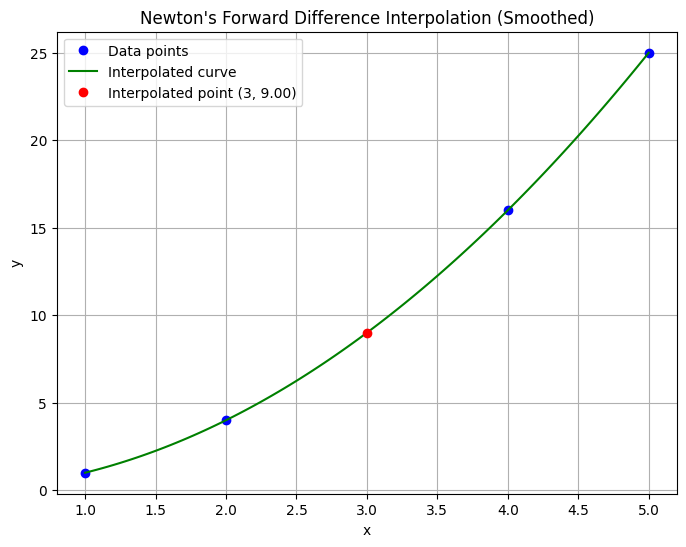

Interpolated value at x=1.5: 2.7500


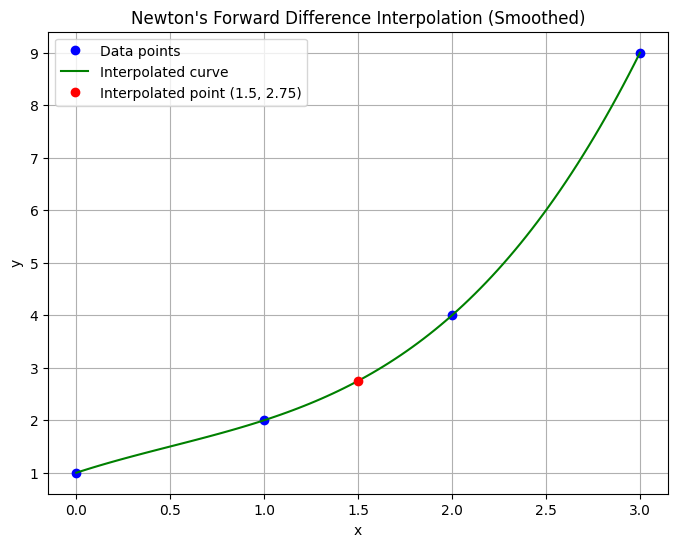

Interpolated value at x=4: 5.6250


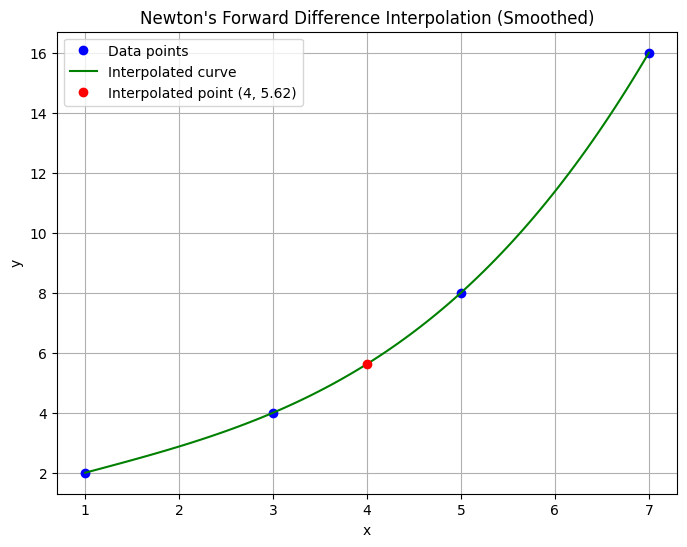

[(3, np.float64(9.0)), (1.5, np.float64(2.75)), (4, np.float64(5.625))]

In [3]:
def newton_forward_interpolation(x, y, x_value):
    n = len(x)
    # Create the forward difference table
    forward_diff = np.zeros((n, n))
    forward_diff[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            forward_diff[i][j] = (forward_diff[i + 1][j - 1] - forward_diff[i][j - 1]) / (x[i + j] - x[i])

    # Interpolate using the forward difference table
    result = forward_diff[0, 0]
    for i in range(1, n):
        term = forward_diff[0, i]
        for j in range(i):
            term *= (x_value - x[j])
        result += term

    return result

def plot_interpolation(x, y, x_value, y_value):
    # Generate a finer set of x-values for a smoother curve
    x_fine = np.linspace(min(x), max(x), 100)
    y_fine = [newton_forward_interpolation(x, y, xi) for xi in x_fine]

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'bo', label='Data points')
    plt.plot(x_fine, y_fine, 'g-', label='Interpolated curve')
    plt.plot(x_value, y_value, 'ro', label=f'Interpolated point ({x_value}, {y_value:.2f})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Newton's Forward Difference Interpolation (Smoothed)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Test Cases
test_cases = [
    (np.array([1, 2, 4, 5]), np.array([1, 4, 16, 25]), 3),
    (np.array([0, 1, 2, 3]), np.array([1, 2, 4, 9]), 1.5),
    (np.array([1, 3, 5, 7]), np.array([2, 4, 8, 16]), 4)
]

results = []
for x, y, x_value in test_cases:
    y_value = newton_forward_interpolation(x, y, x_value)
    print(f"Interpolated value at x={x_value}: {y_value:.4f}")  # Print answer before showing the plot
    results.append((x_value, y_value))
    plot_interpolation(x, y, x_value, y_value)

results

2. <u>Lagrange Interpolation</u>


Lagrange Interpolation - Test Case 1
Interpolated value at x=3: 9.0000


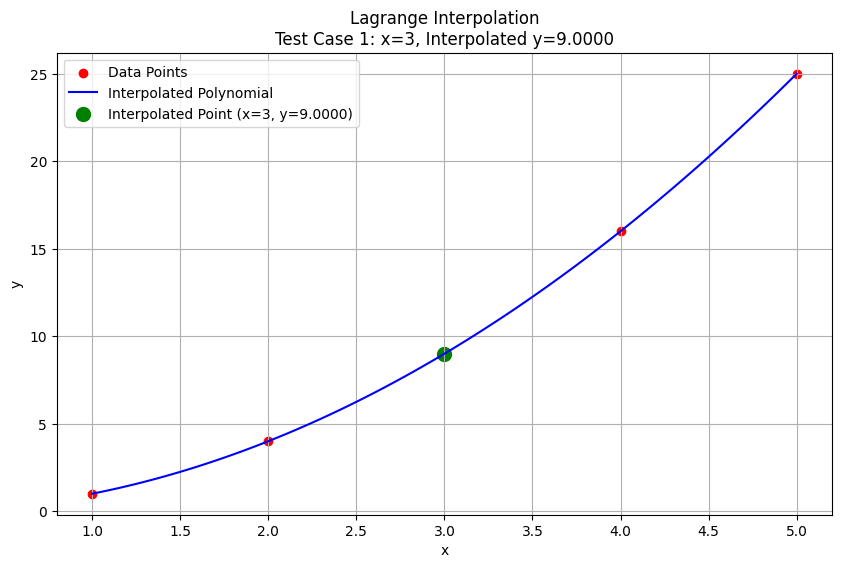


Lagrange Interpolation - Test Case 2
Interpolated value at x=1.5: 2.7500


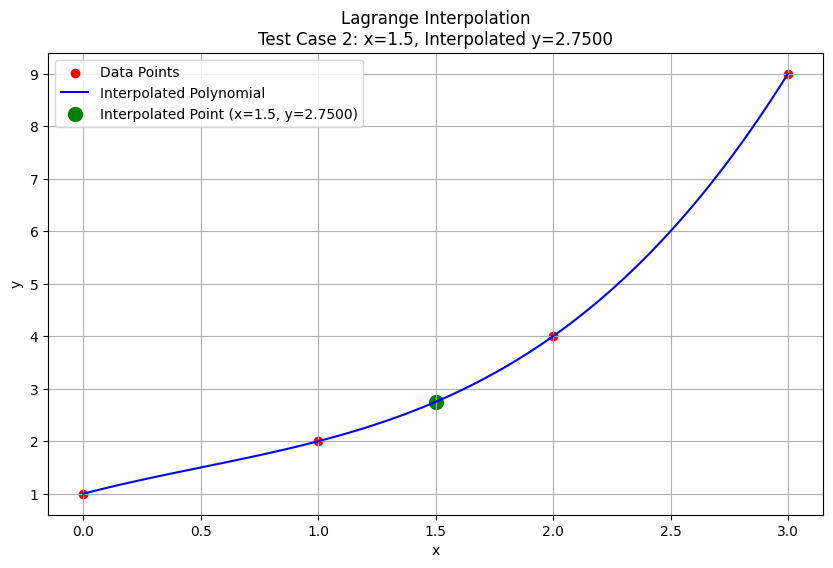

In [4]:
def lagrange_interpolation(x_values, y_values, x_value):
    n = len(x_values)
    result = 0
    
    for i in range(n):
        term = y_values[i]
        for j in range(n):
            if j != i:
                term *= (x_value - x_values[j]) / (x_values[i] - x_values[j])
        result += term
    return result

# Test Case 1
print("\nLagrange Interpolation - Test Case 1")
x1 = np.array([1, 2, 4, 5])
y1 = np.array([1, 4, 16, 25])
x_val1 = 3
interp_val1 = lagrange_interpolation(x1, y1, x_val1)
print(f"Interpolated value at x={x_val1}: {interp_val1:.4f}")

# Plot for Test Case 1
x_interp1 = np.linspace(min(x1), max(x1), 100)
y_interp1 = [lagrange_interpolation(x1, y1, xi) for xi in x_interp1]

plt.figure(figsize=(10, 6))
plt.scatter(x1, y1, color='red', label='Data Points')
plt.plot(x_interp1, y_interp1, color='blue', label='Interpolated Polynomial')
plt.scatter([x_val1], [interp_val1], color='green', s=100, label=f'Interpolated Point (x={x_val1}, y={interp_val1:.4f})')
plt.title(f'Lagrange Interpolation\nTest Case 1: x={x_val1}, Interpolated y={interp_val1:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Test Case 2
print("\nLagrange Interpolation - Test Case 2")
x2 = np.array([0, 1, 2, 3])
y2 = np.array([1, 2, 4, 9])
x_val2 = 1.5
interp_val2 = lagrange_interpolation(x2, y2, x_val2)
print(f"Interpolated value at x={x_val2}: {interp_val2:.4f}")

# Plot for Test Case 2
x_interp2 = np.linspace(min(x2), max(x2), 100)
y_interp2 = [lagrange_interpolation(x2, y2, xi) for xi in x_interp2]

plt.figure(figsize=(10, 6))
plt.scatter(x2, y2, color='red', label='Data Points')
plt.plot(x_interp2, y_interp2, color='blue', label='Interpolated Polynomial')
plt.scatter([x_val2], [interp_val2], color='green', s=100, label=f'Interpolated Point (x={x_val2}, y={interp_val2:.4f})')
plt.title(f'Lagrange Interpolation\nTest Case 2: x={x_val2}, Interpolated y={interp_val2:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

3. <u>Least Squares Method</u>

    - Linear Regression
    - Exponential Regression
    - Polynomial Regression


Linear Regression - Test Case 1
Linear equation: y = 1.0000x + 0.0000


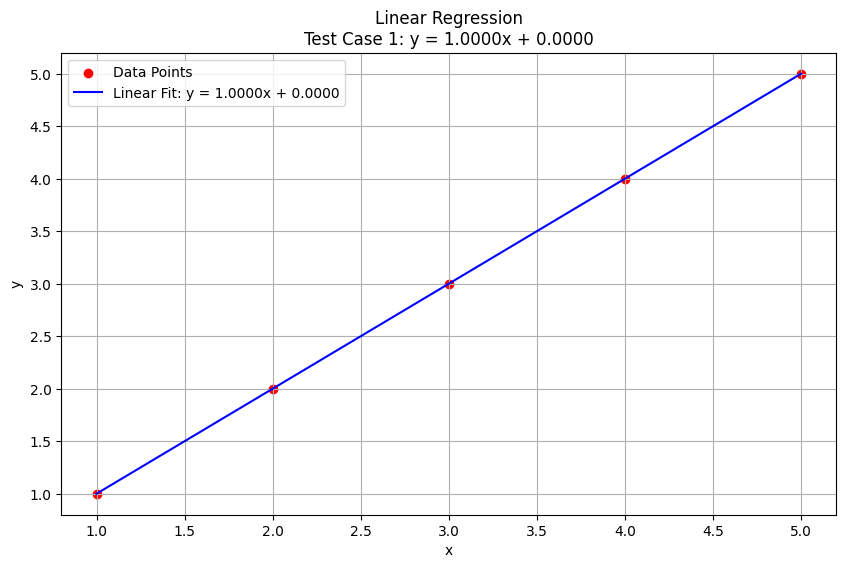

In [5]:
def linear_regression(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2 = np.sum(x**2)
    
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
    c = (sum_y - m * sum_x) / n
    return m, c

# Test Case 1
print("\nLinear Regression - Test Case 1")
x1 = np.array([1, 2, 3, 4, 5])
y1 = np.array([1, 2, 3, 4, 5])
m1, c1 = linear_regression(x1, y1)
print(f"Linear equation: y = {m1:.4f}x + {c1:.4f}")

# Plot for Test Case 1
plt.figure(figsize=(10, 6))
plt.scatter(x1, y1, color='red', label='Data Points')
plt.plot(x1, m1*x1 + c1, color='blue', label=f'Linear Fit: y = {m1:.4f}x + {c1:.4f}')
plt.title(f'Linear Regression\nTest Case 1: y = {m1:.4f}x + {c1:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Expected: y = 2.7e^(0.7x)
Fitted  : y = 1.00e^(1.00x)


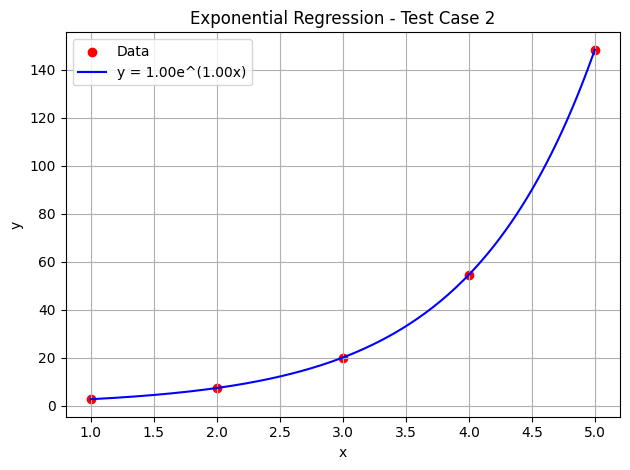

In [6]:
def exp_model(x, a, b):
    return a * np.exp(b * x)

# Test Case 2
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.7, 7.4, 20.1, 54.6, 148.4])

# Fit model
a, b = curve_fit(exp_model, x, y)[0]
print(f"Expected: y = 2.7e^(0.7x)")
print(f"Fitted  : y = {a:.2f}e^({b:.2f}x)")

# Plot
x_fit = np.linspace(x.min(), x.max(), 200)
plt.scatter(x, y, color='red', label='Data')
plt.plot(x_fit, exp_model(x_fit, a, b), color='blue', label=f'y = {a:.2f}e^({b:.2f}x)')
plt.title('Exponential Regression - Test Case 2')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(True)
plt.tight_layout(); plt.show()



Polynomial Regression - Test Case 3
Polynomial equation:
   3
1 x - 0 x


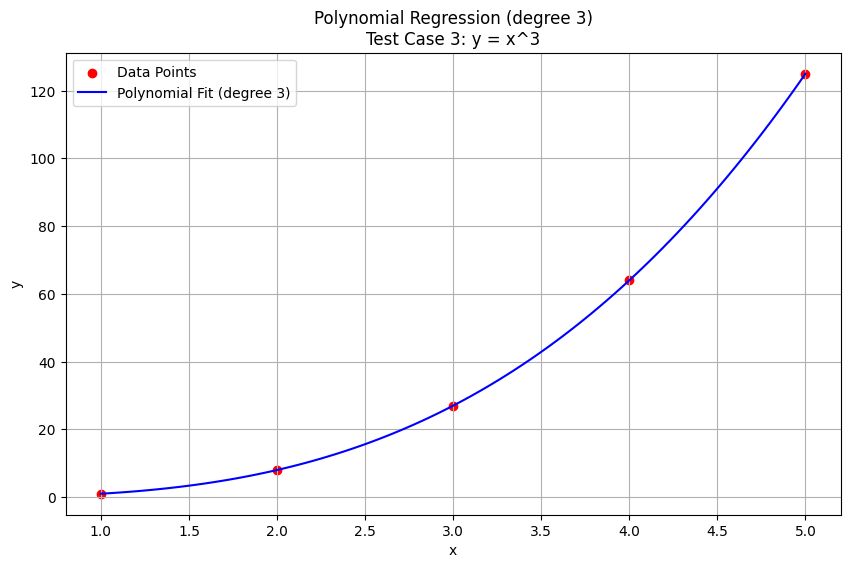

In [7]:
def polynomial_regression(x, y, degree):
    coeffs = np.polyfit(x, y, degree)
    return coeffs

# Test Case 3
print("\nPolynomial Regression - Test Case 3")
x3 = np.array([1, 2, 3, 4, 5])
y3 = np.array([1, 8, 27, 64, 125])
degree = 3

coeffs3 = polynomial_regression(x3, y3, degree)
rounded_coeffs = np.round(coeffs3, decimals=5)
poly_func = np.poly1d(rounded_coeffs)

print("Polynomial equation:")
print(poly_func)

# Plot
x_fine = np.linspace(min(x3), max(x3), 100)
plt.figure(figsize=(10, 6))
plt.scatter(x3, y3, color='red', label='Data Points')
plt.plot(x_fine, poly_func(x_fine), color='blue', label=f'Polynomial Fit (degree {degree})')
plt.title(f'Polynomial Regression (degree {degree})\nTest Case 3: y = x^3')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

4. <u>Cubic Spline Interpolation</u>

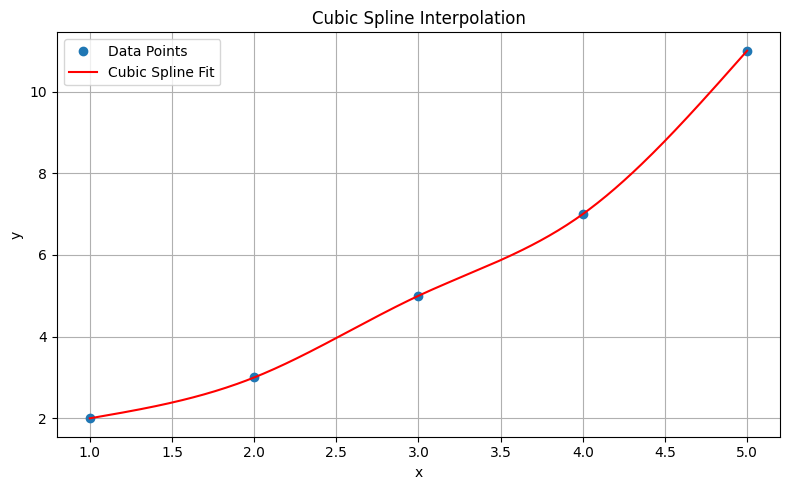

In [8]:
def cubic_spline_interpolation(x, y):
    n = len(x)
    h = np.diff(x)
    A = np.zeros((n, n))
    b_vec = np.zeros(n)

    A[0, 0] = A[-1, -1] = 1
    for i in range(1, n - 1):
        A[i, i-1] = h[i-1]
        A[i, i]   = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        b_vec[i]  = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])

    c = np.linalg.solve(A, b_vec)
    a, b, d = y[:-1], np.zeros(n-1), np.zeros(n-1)
    for i in range(n - 1):
        b[i] = (y[i+1] - y[i]) / h[i] - h[i]*(2*c[i] + c[i+1]) / 3
        d[i] = (c[i+1] - c[i]) / (3*h[i])
    return a, b, c[:-1], d

def evaluate_spline(xq, x, a, b, c, d):
    i = np.searchsorted(x, xq) - 1
    i = np.clip(i, 0, len(a) - 1)
    dx = xq - x[i]
    return a[i] + b[i]*dx + c[i]*dx**2 + d[i]*dx**3

# Data
x_vals = np.array([1, 2, 3, 4, 5])
y_vals = np.array([2, 3, 5, 7, 11])

# Interpolate and evaluate
a, b, c, d = cubic_spline_interpolation(x_vals, y_vals)
x_fine = np.linspace(x_vals[0], x_vals[-1], 300)
y_fine = [evaluate_spline(xi, x_vals, a, b, c, d) for xi in x_fine]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_fine, y_fine, 'r-', label='Cubic Spline Fit')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x'); plt.ylabel('y')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()